In [ ]:
from TradingviewData import TradingViewData,Interval

request = TradingViewData()

Note: you may need to restart the kernel to use updated packages.


In [3]:
request.search('DOGEUSD')

Expecting value: line 1 column 1 (char 0)


[]

In [4]:
nifty_data = request.get_hist(symbol='NIFTY',exchange='NSE',interval=Interval.hour_1,n_bars=1000)

nifty_data

,symbol,open,high,low,close,volume
datetime,,,,,,
2025-06-27 07:45:00,NSE:NIFTY,25607.35,25617.80,25595.65,25612.25,46874919.0
2025-06-27 08:45:00,NSE:NIFTY,25612.45,25649.35,25612.10,25616.65,38932650.0
2025-06-27 09:45:00,NSE:NIFTY,25617.35,25639.35,25608.80,25634.25,32197241.0
2025-06-27 10:45:00,NSE:NIFTY,25634.40,25654.20,25611.25,25633.00,182328785.0
2025-06-27 11:45:00,NSE:NIFTY,25632.60,25649.95,25629.60,25632.45,117060276.0
...,...,...,...,...,...,...
2026-01-23 06:45:00,NSE:NIFTY,25285.30,25289.90,25183.65,25185.20,44965557.0
2026-01-23 07:45:00,NSE:NIFTY,25185.95,25243.80,25180.25,25196.40,49805744.0
2026-01-23 08:45:00,NSE:NIFTY,25196.65,25197.35,25043.85,25063.40,57533809.0


<Axes: >

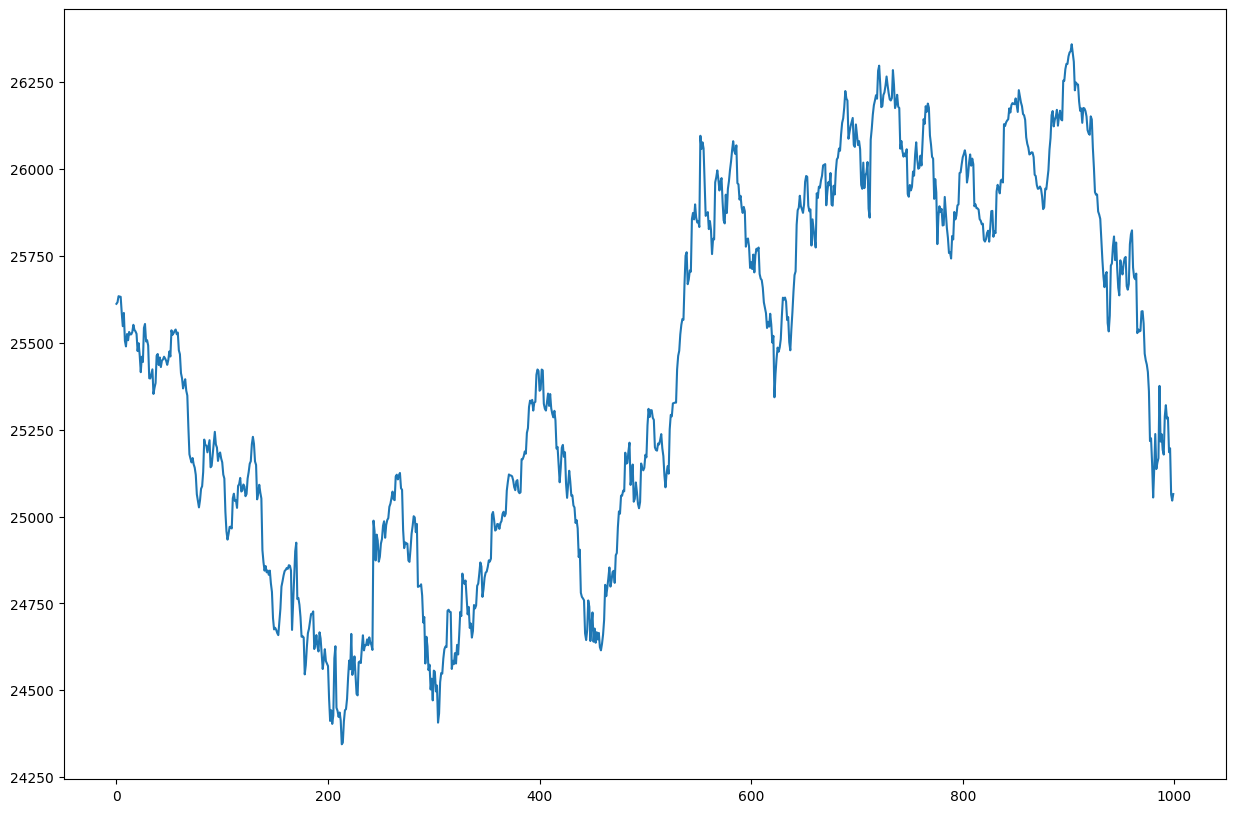

In [5]:
nifty_data.close.plot(figsize=(15,10),use_index=False)

In [ ]:
import os

doge_data = request.get_hist(symbol='DOGEUSD',exchange='BINANCE',interval=Interval.hour_4,n_bars=5*365*6)
doge_data = doge_data.drop("symbol", axis=1)

for year in range(2020, 2026):
    for month in range(1, 13):
        start_date = f'{year}-{month:02d}-01'
        if month == 12:
            end_date = f'{year+1}-01-01'
        else:
            end_date = f'{year}-{month+1:02d}-01'
        
        monthly_data = doge_data[(doge_data.index >= start_date) & (doge_data.index < end_date)]
        if not monthly_data.empty:
            folder_path = f'doge_data/year={year}/month={month:02d}'
            os.makedirs(folder_path, exist_ok=True)
            monthly_data.to_csv(f'{folder_path}/doge_data_{year}_{month:02d}.csv')
            print(f'Saved {folder_path}/doge_data_{year}_{month:02d}.csv with {len(monthly_data)} rows')


doge_data 

Saved doge_data/year=2023/month=01/doge_data_2023_01.csv with 186 rows
Saved doge_data/year=2023/month=02/doge_data_2023_02.csv with 168 rows
Saved doge_data/year=2023/month=03/doge_data_2023_03.csv with 186 rows
Saved doge_data/year=2023/month=04/doge_data_2023_04.csv with 180 rows
Saved doge_data/year=2023/month=05/doge_data_2023_05.csv with 186 rows
Saved doge_data/year=2023/month=06/doge_data_2023_06.csv with 180 rows
Saved doge_data/year=2023/month=07/doge_data_2023_07.csv with 186 rows
Saved doge_data/year=2023/month=08/doge_data_2023_08.csv with 186 rows
Saved doge_data/year=2023/month=09/doge_data_2023_09.csv with 180 rows
Saved doge_data/year=2023/month=10/doge_data_2023_10.csv with 186 rows
Saved doge_data/year=2023/month=11/doge_data_2023_11.csv with 180 rows
Saved doge_data/year=2023/month=12/doge_data_2023_12.csv with 186 rows
Saved doge_data/year=2024/month=01/doge_data_2024_01.csv with 186 rows
Saved doge_data/year=2024/month=02/doge_data_2024_02.csv with 174 rows
Saved 

,open,high,low,close,volume
datetime,,,,,
2023-01-01 01:00:00,0.0701,0.0704,0.0694,0.0697,3970571.0
2023-01-01 05:00:00,0.0697,0.0699,0.0690,0.0694,3143779.0
2023-01-01 09:00:00,0.0694,0.0699,0.0691,0.0696,1610516.0
2023-01-01 13:00:00,0.0697,0.0699,0.0693,0.0699,1807519.0
2023-01-01 17:00:00,0.0697,0.0708,0.0695,0.0702,6097009.0
...,...,...,...,...,...
2026-01-26 01:00:00,0.1195,0.1222,0.1195,0.1211,564865.0
2026-01-26 05:00:00,0.1212,0.1222,0.1210,0.1221,119732.0
2026-01-26 09:00:00,0.1223,0.1223,0.1200,0.1203,371489.0
